In [1]:
using Plots
using Plots, PlotRecipes
using LaTeXStrings

    +(AbstractArray

# Tarea 2

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [2]:
#
# Definimos la función del problema
#

function F(x)
    y = x^2 + complex (0.12256484161600012, - 0.74486407104)
    return y
end

, DataArrays.

F (generic function with 1 method)

In [3]:
#
# Creamos una función para graficar
#
# n número de iteraciones
# Step es el tamaño del paso
# Intervalo es el tamaño/magnitud de visualización de la gráfica

function GraficadorF(n,Step,Intervalo)
    Datos = Complex64[]
    for i in -1.0:Step:1.0
        for j in -1.0:Step:1.0
            Num = complex(i,j)
            for k in 1:n
                y = F(Num)
                Num = y
            end
            push!(Datos,Num)
        end
    end
    Real = Float64[]
    Imag = Float64[]
    l = length(Datos)
    for i in 1:l
        push!(Real,real(Datos[i]))
        push!(Imag,imag(Datos[i]))
    end
    plot(Real,Imag, 
    xaxis=(L"Real", (-Intervalo, Intervalo), ), 
        yaxis=((-Intervalo, Intervalo), L"Imaginario"), 
        legend=false, title=L"Z_{n+1} = Z_n + c", grid=true)
end

DataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:276

GraficadorF (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.



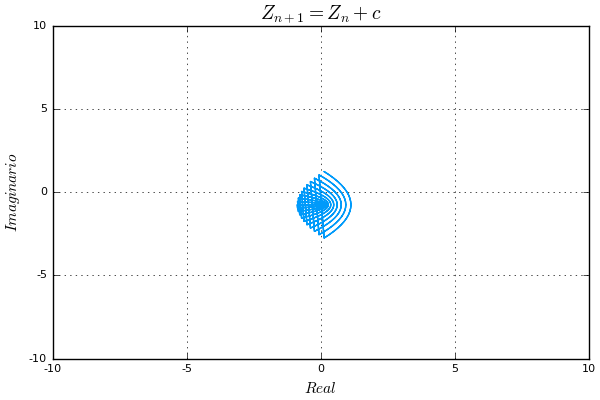

In [4]:
GraficadorF(1,0.1,10.0)


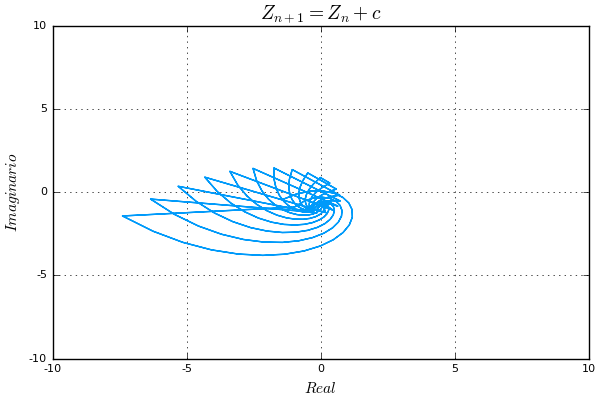

In [5]:
GraficadorF(2,0.1,10.0)


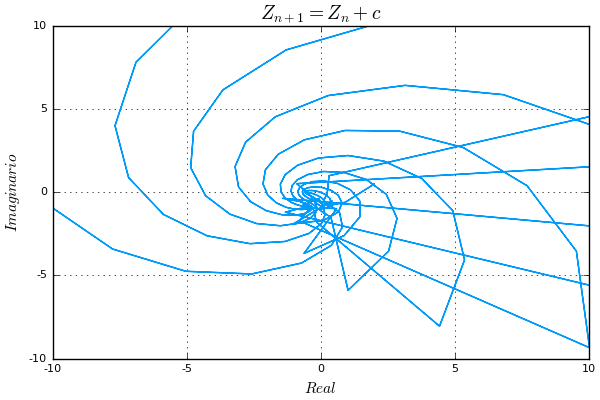

In [6]:
GraficadorF(3,0.1,10.0)


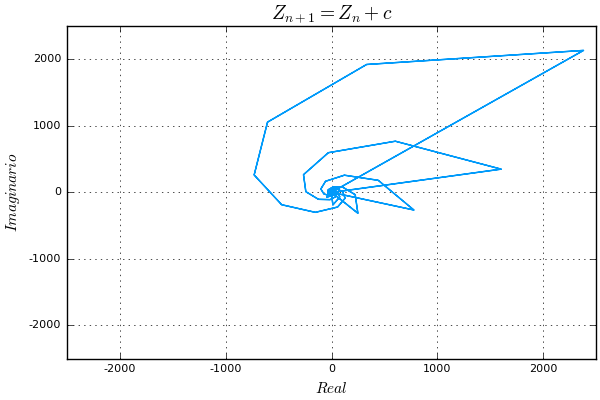

In [7]:
GraficadorF(4,0.1,2500.0)


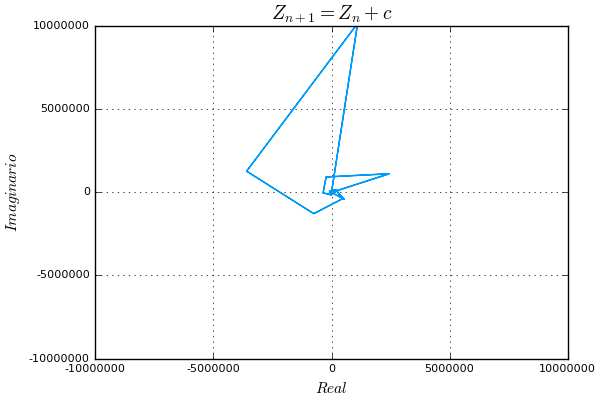

In [8]:
GraficadorF(5,0.1,10000000.0)


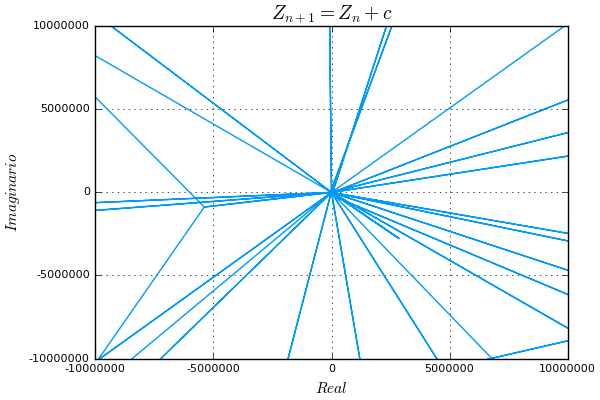

In [9]:
GraficadorF(10,0.1,10000000.0)


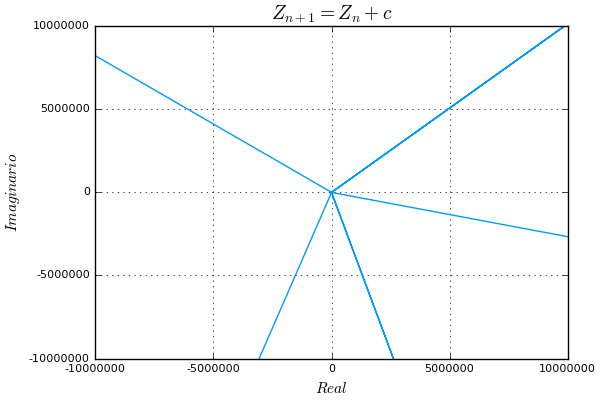

In [10]:
GraficadorF(20,0.1,10000000.0)

# Nada converge?

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

# No entiendo a que se refieren con usar compute_roots

In [11]:
function compute_roots(f, f´)
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)
    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end
        roots[j] = x
    end
    roots
end

compute_roots (generic function with 1 method)

In [12]:
#
# Definimos la función del problema
# Usando ésta función abajo da un error mortal :(

function B(x)
    b = mod(2x,1)
    return b
end

B (generic function with 1 method)

In [13]:
function GraficadorB(n,x0)
    Datos = Float64[x0]
    for i in 1:n
        y = mod(2*Datos[i],1)
        push!(Datos,y)
    end
    plot(Datos, 
    xaxis=(L"Iteración",), 
        yaxis=((0.0,1.0), L"B(x)"), 
        legend=false, title=L"X_{n+1} = 2*X_n mod 1", grid=true)    
end

GraficadorB (generic function with 1 method)


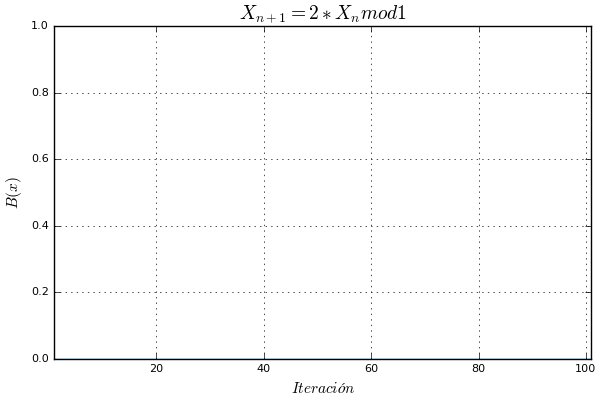

In [14]:
GraficadorB(100,0.0)


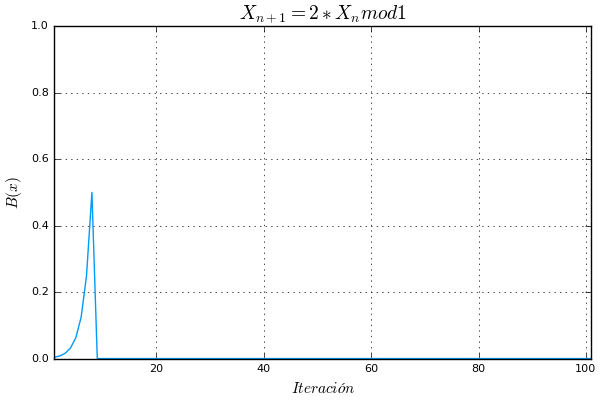

In [15]:
GraficadorB(100,0.00390625) # 1/256


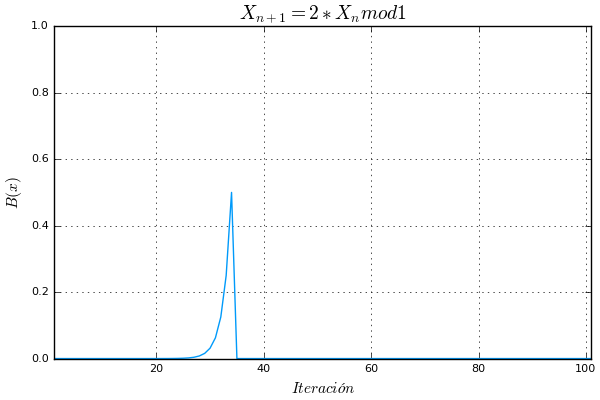

In [16]:
GraficadorB(100,5.82076609134674072265625e-11)  #Otro múltiplo de 2


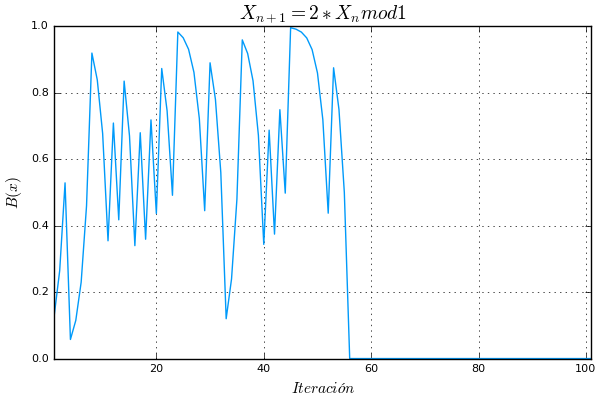

In [17]:
GraficadorB(100,0.132182)


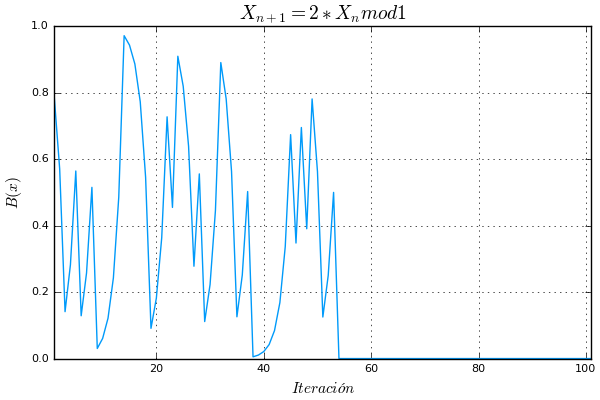

In [18]:
GraficadorB(100,0.785274852482)


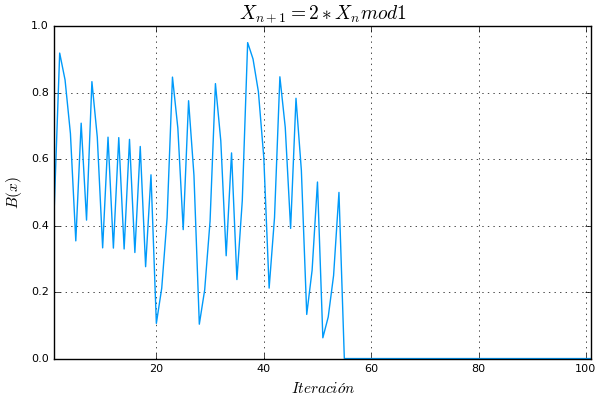

In [19]:
GraficadorB(100,0.45963498282)